In [2]:
import mlrose_hiive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from ucimlrepo import fetch_ucirepo 
import time

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from mlrose_hiive import NNGSRunner

from multiprocessing import Pool

# fetch dataset 
statlog_vehicle_silhouettes = fetch_ucirepo(id=149) 
  
# data (as pandas dataframes) 
X_df = statlog_vehicle_silhouettes.data.features 
y_df = statlog_vehicle_silhouettes.data.targets 
  
# metadata 
#print(statlog_vehicle_silhouettes.metadata) 
  
# variable information 
#print(statlog_vehicle_silhouettes.variables) 

print(X_df)
print(y_df)

print('Classes')
print(y_df.groupby(['class'])['class'].count())

label_encoder = LabelEncoder()
y_df['class'] = label_encoder.fit_transform(y_df['class'])
y_df.info()

print('Classes')
print(y_df.groupby(['class'])['class'].count())

data_df = pd.concat([X_df, y_df], axis=1)

nans = data_df.isna()
print('Missing values')
print(nans.sum(axis=0))

data_df.dropna(inplace=True)
data_df = data_df[data_df['class'] != 0]

data_df.reset_index(drop=True,inplace=True)

print(data_df.groupby(['class'])['class'].count())

data_df['class'].values[data_df['class'].values != 2] = 0
data_df['class'].values[data_df['class'].values == 2] = 1

print(data_df.groupby(['class'])['class'].count())

# Feature df
X_df = data_df.copy()
X_df.drop(['class'], axis=1, inplace=True)

X = X_df.values
y = data_df['class'].values

seed = 903946366

# Shuffle data and then split into the training and the test set
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = seed, 
                                                    stratify = y)

# Standardize data
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test = scaler.transform(X_test)
was 
# Shuffle training data and then split into training and validation set 
X_train, X_vld, y_train, y_vld = train_test_split(X_train_full, y_train_full, test_size = 0.2, shuffle = True, random_state = 1988, 
                                                    stratify = y_train_full)

     COMPACTNESS  CIRCULARITY  DISTANCE CIRCULARITY  RADIUS RATIO  \
0           95.0           48                    83           178   
1           91.0           41                    84           141   
2          104.0           50                   106           209   
3           93.0           41                    82           159   
4           85.0           44                    70           205   
..           ...          ...                   ...           ...   
841         93.0           39                    87           183   
842         89.0           46                    84           163   
843        106.0           54                   101           222   
844         86.0           36                    78           146   
845         85.0           36                    66           123   

     PR.AXIS ASPECT RATIO  MAX.LENGTH ASPECT RATIO  SCATTER RATIO  \
0                      72                       10            162   
1                      57        

#### 1) RHC Algorithm

In [18]:
from multiprocessing import Pool
import workers_rhc

seed_list = [1, 2, 3, 4, 5]

learning_rate_list = [0.1]
restart_list = [0]
max_iters = 100000
early_stopping = False
max_attempts = 100

parameters = []

output_file = 'rhc_clbr_lr0.1_false'

for restarts in restart_list:
    for learning_rate in learning_rate_list:
        for seed in seed_list:
            
            parameters.append((restarts, max_iters, learning_rate, early_stopping, max_attempts, seed, X_train, y_train, X_vld, y_vld, output_file))

print('restarts', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('restarts', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', 
      'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 'train_time',
      file=open(output_file+'_results.txt', 'a'))
                 
if __name__ ==  '__main__':
    p=Pool(processes = 5)
    output = p.map(workers_rhc.rhc_clbr, parameters)
    print('Done!')
    
fitcrv_rhc_lr01_fls=pd.DataFrame()
for seed in seed_list:
    fitcrv_rhc_lr01_fls[f'seed{seed}'] = output[seed-1][:,0]
fitcrv_rhc_lr01_fls.ffill(inplace=True)
fitcrv_rhc_lr01_fls['mean'] = fitcrv_rhc_lr01_fls.mean(axis=1)
fitcrv_rhc_lr01_fls['std'] = fitcrv_rhc_lr01_fls.std(axis=1)

Done!


In [115]:
seed_list = [1, 2, 3, 4, 5]

learning_rate_list = [0.1]
restart_list = [0]
max_iters = 10000
early_stopping = True
max_attempts = 10

parameters = []

output_file = 'rhc_clbr_lr0.1_true10'

for restarts in restart_list:
    for learning_rate in learning_rate_list:
        for seed in seed_list:
            
            parameters.append((restarts, max_iters, learning_rate, early_stopping, max_attempts, seed, X_train, y_train, X_vld, y_vld, output_file))

print('restarts', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('restarts', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', 
      'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 
      file=open(output_file+'_results.txt', 'a'))
                 
if __name__ ==  '__main__':
    p=Pool(processes = 5)
    output = p.map(workers_rhc.rhc_clbr, parameters)
    print('Done!')

Done!


In [116]:
fitcrv=pd.DataFrame()
k = -1
max_len = 0
columns = []
for seed in seed_list:
    k += 1
    if (output[k].shape[0] > max_len): max_len = output[k].shape[0]
    columns.append(f'seed{seed}')
   
fitcrv = pd.DataFrame(np.nan, index=list(range(0,max_len)), columns=columns)
k = -1
for seed in seed_list:
    k += 1
    fitcrv[f'seed{seed}'].values[0:output[k].shape[0]] = output[k][:,0]
fitcrv.ffill(inplace=True)
fitcrv['mean'] = fitcrv.mean(axis=1)
fitcrv['std'] = fitcrv.std(axis=1)
fitcrv_rhc_lr01_tr10 = fitcrv

In [24]:
seed_list = [1, 2, 3, 4, 5]

learning_rate_list = [0.1]
restart_list = [0]
max_iters = 10000
early_stopping = True
max_attempts = 400

parameters = []

output_file = 'rhc_clbr_lr0.1_true100'

for restarts in restart_list:
    for learning_rate in learning_rate_list:
        for seed in seed_list:
            
            parameters.append((restarts, max_iters, learning_rate, early_stopping, max_attempts, seed, X_train, y_train, X_vld, y_vld, output_file))

print('restarts', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('restarts', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', 
      'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 
      file=open(output_file+'_results.txt', 'a'))
                 
if __name__ ==  '__main__':
    p=Pool(processes = 5)
    output = p.map(workers_rhc.rhc_clbr, parameters)
    print('Done!')

fitcrv=pd.DataFrame()
k = -1
max_len = 0
columns = []
for seed in seed_list:
    k += 1
    if (output[k].shape[0] > max_len): max_len = output[k].shape[0]
    columns.append(f'seed{seed}')
   
fitcrv = pd.DataFrame(np.nan, index=list(range(0,max_len)), columns=columns)
k = -1
for seed in seed_list:
    k += 1
    fitcrv[f'seed{seed}'].values[0:output[k].shape[0]] = output[k][:,0]
fitcrv.ffill(inplace=True)
fitcrv['mean'] = fitcrv.mean(axis=1)
fitcrv['std'] = fitcrv.std(axis=1)
fitcrv_rhc_lr01_tr100 = fitcrv

Done!


In [113]:
seed_list = [1, 2, 3, 4, 5]

learning_rate_list = [0.1]
restart_list = [0]
max_iters = 10000
early_stopping = True
max_attempts = 50

parameters = []

output_file = 'rhc_clbr_lr0.1_true50'

for restarts in restart_list:
    for learning_rate in learning_rate_list:
        for seed in seed_list:
            
            parameters.append((restarts, max_iters, learning_rate, early_stopping, max_attempts, seed, X_train, y_train, X_vld, y_vld, output_file))

print('restarts', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('restarts', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', 
      'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 
      file=open(output_file+'_results.txt', 'a'))
                 
if __name__ ==  '__main__':
    p=Pool(processes = 5)
    output = p.map(workers_rhc.rhc_clbr, parameters)
    print('Done!')


Done!


In [114]:
fitcrv=pd.DataFrame()
k = -1
max_len = 0
columns = []
for seed in seed_list:
    k += 1
    if (output[k].shape[0] > max_len): max_len = output[k].shape[0]
    columns.append(f'seed{seed}')
   
fitcrv = pd.DataFrame(np.nan, index=list(range(0,max_len)), columns=columns)
k = -1
for seed in seed_list:
    k += 1
    fitcrv[f'seed{seed}'].values[0:output[k].shape[0]] = output[k][:,0]
fitcrv.ffill(inplace=True)
fitcrv['mean'] = fitcrv.mean(axis=1)
fitcrv['std'] = fitcrv.std(axis=1)
fitcrv_rhc_lr01_tr50 = fitcrv

In [127]:
fitcrv_rhc_lr01_tr10.to_csv('fitcrv_rhc_lr01_tr10.csv', index=False) 
fitcrv_rhc_lr01_tr50.to_csv('fitcrv_rhc_lr01_tr50.csv', index=False) 

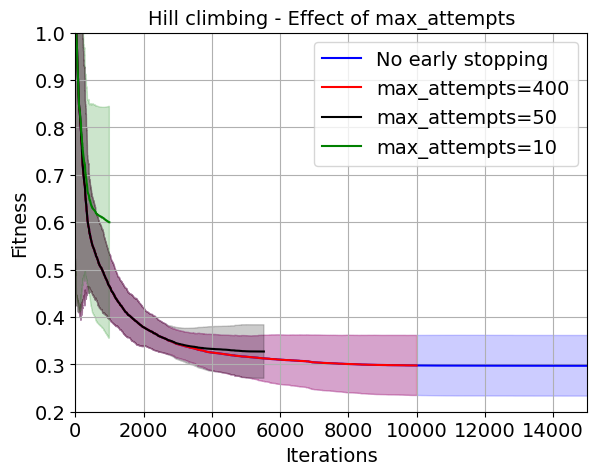

In [134]:
fontsize = 14
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])

ax.plot(range(fitcrv_rhc_lr01_fls.shape[0]), fitcrv_rhc_lr01_fls['mean'], label='No early stopping', color='b')
ax.fill_between(range(fitcrv_rhc_lr01_fls.shape[0]), fitcrv_rhc_lr01_fls['mean'] - 2*fitcrv_rhc_lr01_fls['std'], 
                                                     fitcrv_rhc_lr01_fls['mean'] + 2*fitcrv_rhc_lr01_fls['std'], alpha=0.2, color="b")

ax.plot(range(fitcrv_rhc_lr01_tr100.shape[0]), fitcrv_rhc_lr01_tr100['mean'], label='max_attempts=400', color='r')
ax.fill_between(range(fitcrv_rhc_lr01_tr100.shape[0]), fitcrv_rhc_lr01_tr100['mean'] - 2*fitcrv_rhc_lr01_tr100['std'], 
                                                       fitcrv_rhc_lr01_tr100['mean'] + 2*fitcrv_rhc_lr01_tr100['std'], alpha=0.2, color="r")

ax.plot(range(fitcrv_rhc_lr01_tr50.shape[0]), fitcrv_rhc_lr01_tr50['mean'], label='max_attempts=50', color='k')
ax.fill_between(range(fitcrv_rhc_lr01_tr50.shape[0]), fitcrv_rhc_lr01_tr50['mean'] - 2*fitcrv_rhc_lr01_tr50['std'], 
                                                      fitcrv_rhc_lr01_tr50['mean'] + 2*fitcrv_rhc_lr01_tr50['std'], alpha=0.2, color="k")

ax.plot(range(fitcrv_rhc_lr01_tr10.shape[0]), fitcrv_rhc_lr01_tr10['mean'], label='max_attempts=10', color='g')
ax.fill_between(range(fitcrv_rhc_lr01_tr10.shape[0]), fitcrv_rhc_lr01_tr10['mean'] - 2*fitcrv_rhc_lr01_tr10['std'], 
                                                      fitcrv_rhc_lr01_tr10['mean'] + 2*fitcrv_rhc_lr01_tr10['std'], alpha=0.2, color="g")

ax.tick_params(labelsize=fontsize)
# restart = 0, step_size=0.1
ax.set_title('Hill climbing - Effect of max_attempts', fontsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fitness', fontsize=fontsize)
ax.set_xlim(0, 15000)
plt.grid(True)
ax.set_ylim(0.2, 1)
ax.legend(fontsize=fontsize)
plt.show()
fig.savefig('rhc_effect_max_attempts.png')
plt.close(fig)

In [11]:
seed_list = [1, 2, 3, 4, 5]

learning_rate_list = [0.01]
restart_list = [0]
max_iters = 160000
early_stopping = False
max_attempts = 10

parameters = []

output_file = 'rhc_clbr_lr0.01_false'

for restarts in restart_list:
    for learning_rate in learning_rate_list:
        for seed in seed_list:
            
            parameters.append((restarts, max_iters, learning_rate, early_stopping, max_attempts, seed, X_train, y_train, X_vld, y_vld, output_file))

print('restarts', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('restarts', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', 
      'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 
      file=open(output_file+'_results.txt', 'a'))
                 
if __name__ ==  '__main__':
    p=Pool(processes = 5)
    output = p.map(workers_rhc.rhc_clbr, parameters)
    print('Done!')

Done!


In [12]:
fitcrv=pd.DataFrame()
k = -1
max_len = 0
columns = []
for seed in seed_list:
    k += 1
    if (output[k].shape[0] > max_len): max_len = output[k].shape[0]
    columns.append(f'seed{seed}')
   
fitcrv = pd.DataFrame(np.nan, index=list(range(0,max_len)), columns=columns)
k = -1
for seed in seed_list:
    k += 1
    fitcrv[f'seed{seed}'].values[0:output[k].shape[0]] = output[k][:,0]
fitcrv.ffill(inplace=True)
fitcrv['mean'] = fitcrv.mean(axis=1)
fitcrv['std'] = fitcrv.std(axis=1)
fitcrv_rhc_lr001_fls = fitcrv

In [22]:
seed_list = [1, 2, 3, 4, 5]

learning_rate_list = [0.01]
restart_list = [0]
max_iters = 160000
early_stopping = True
max_attempts = 350

parameters = []

output_file = 'rhc_clbr_lr0.01_tr200'

for restarts in restart_list:
    for learning_rate in learning_rate_list:
        for seed in seed_list:
            
            parameters.append((restarts, max_iters, learning_rate, early_stopping, max_attempts, seed, X_train, y_train, X_vld, y_vld, output_file))

print('restarts', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('restarts', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', 
      'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 
      file=open(output_file+'_results.txt', 'a'))
                 
if __name__ ==  '__main__':
    p=Pool(processes = 5)
    output = p.map(workers_rhc.rhc_clbr, parameters)
    print('Done!')

fitcrv=pd.DataFrame()
k = -1
max_len = 0
columns = []
for seed in seed_list:
    k += 1
    if (output[k].shape[0] > max_len): max_len = output[k].shape[0]
    columns.append(f'seed{seed}')
   
fitcrv = pd.DataFrame(np.nan, index=list(range(0,max_len)), columns=columns)
k = -1
for seed in seed_list:
    k += 1
    fitcrv[f'seed{seed}'].values[0:output[k].shape[0]] = output[k][:,0]
fitcrv.ffill(inplace=True)
fitcrv['mean'] = fitcrv.mean(axis=1)
fitcrv['std'] = fitcrv.std(axis=1)
fitcrv_rhc_lr001_re200 = fitcrv

Done!


In [26]:
seed_list = [1, 2, 3, 4, 5]

learning_rate_list = [0.001]
restart_list = [0]
max_iters = 800000
early_stopping = False
max_attempts = 10

parameters = []

output_file = 'rhc_clbr_lr0.001_false'

for restarts in restart_list:
    for learning_rate in learning_rate_list:
        for seed in seed_list:
            
            parameters.append((restarts, max_iters, learning_rate, early_stopping, max_attempts, seed, X_train, y_train, X_vld, y_vld, output_file))

print('restarts', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('restarts', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', 
      'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 
      file=open(output_file+'_results.txt', 'a'))
                 
if __name__ ==  '__main__':
    p=Pool(processes = 5)
    output = p.map(workers_rhc.rhc_clbr, parameters)
    print('Done!')

Done!


In [28]:
fitcrv=pd.DataFrame()
k = -1
max_len = 0
columns = []
for seed in seed_list:
    k += 1
    if (output[k].shape[0] > max_len): max_len = output[k].shape[0]
    columns.append(f'seed{seed}')
   
fitcrv = pd.DataFrame(np.nan, index=list(range(0,max_len)), columns=columns)
k = -1
for seed in seed_list:
    k += 1
    fitcrv[f'seed{seed}'].values[0:output[k].shape[0]] = output[k][:,0]
fitcrv.ffill(inplace=True)
fitcrv['mean'] = fitcrv.mean(axis=1)
fitcrv['std'] = fitcrv.std(axis=1)
fitcrv_rhc_lr0001_fls = fitcrv

In [30]:
seed_list = [1, 2, 3, 4, 5]

learning_rate_list = [0.001]
restart_list = [0]
max_iters = 800000
early_stopping = True
max_attempts = 400

parameters = []

output_file = 'rhc_clbr_lr0.001_tr'

for restarts in restart_list:
    for learning_rate in learning_rate_list:
        for seed in seed_list:
            
            parameters.append((restarts, max_iters, learning_rate, early_stopping, max_attempts, seed, X_train, y_train, X_vld, y_vld, output_file))

print('restarts', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('restarts', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', 
      'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 
      file=open(output_file+'_results.txt', 'a'))
                 
if __name__ ==  '__main__':
    p=Pool(processes = 5)
    output = p.map(workers_rhc.rhc_clbr, parameters)
    print('Done!')

fitcrv=pd.DataFrame()
k = -1
max_len = 0
columns = []
for seed in seed_list:
    k += 1
    if (output[k].shape[0] > max_len): max_len = output[k].shape[0]
    columns.append(f'seed{seed}')
   
fitcrv = pd.DataFrame(np.nan, index=list(range(0,max_len)), columns=columns)
k = -1
for seed in seed_list:
    k += 1
    fitcrv[f'seed{seed}'].values[0:output[k].shape[0]] = output[k][:,0]
fitcrv.ffill(inplace=True)
fitcrv['mean'] = fitcrv.mean(axis=1)
fitcrv['std'] = fitcrv.std(axis=1)
fitcrv_rhc_lr0001_tr = fitcrv

Done!


In [5]:
seed_list = [1, 2, 3, 4, 5]

learning_rate_list = [0.005]
restart_list = [0]
max_iters = 400000
early_stopping = False
max_attempts = 10

parameters = []

output_file = 'rhc_clbr_lr0.005_false'

for restarts in restart_list:
    for learning_rate in learning_rate_list:
        for seed in seed_list:
            
            parameters.append((restarts, max_iters, learning_rate, early_stopping, max_attempts, seed, X_train, y_train, X_vld, y_vld, output_file))

print('restarts', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('restarts', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', 
      'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 
      file=open(output_file+'_results.txt', 'a'))
                 
if __name__ ==  '__main__':
    p=Pool(processes = 5)
    output = p.map(workers_rhc.rhc_clbr, parameters)
    print('Done!')

fitcrv=pd.DataFrame()
k = -1
max_len = 0
columns = []
for seed in seed_list:
    k += 1
    if (output[k].shape[0] > max_len): max_len = output[k].shape[0]
    columns.append(f'seed{seed}')
   
fitcrv = pd.DataFrame(np.nan, index=list(range(0,max_len)), columns=columns)
k = -1
for seed in seed_list:
    k += 1
    fitcrv[f'seed{seed}'].values[0:output[k].shape[0]] = output[k][:,0]
fitcrv.ffill(inplace=True)
fitcrv['mean'] = fitcrv.mean(axis=1)
fitcrv['std'] = fitcrv.std(axis=1)
fitcrv_rhc_lr0005_fls = fitcrv

Done!


In [16]:
seed_list = [1, 2, 3, 4, 5]

learning_rate_list = [0.005]
restart_list = [0]
max_iters = 400000
early_stopping = True
max_attempts = 400

parameters = []

output_file = 'rhc_clbr_lr0.005_tr150'

for restarts in restart_list:
    for learning_rate in learning_rate_list:
        for seed in seed_list:
            
            parameters.append((restarts, max_iters, learning_rate, early_stopping, max_attempts, seed, X_train, y_train, X_vld, y_vld, output_file))

print('restarts', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('restarts', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', 
      'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 'train_time',
      file=open(output_file+'_results.txt', 'a'))

tic = time.perf_counter()
if __name__ ==  '__main__':
    p=Pool(processes = 5)
    output = p.map(workers_rhc.rhc_clbr, parameters)
    print('Done!')
toc = time.perf_counter()
print(f'train_time={toc-tic}')

fitcrv=pd.DataFrame()
k = -1
max_len = 0
columns = []
for seed in seed_list:
    k += 1
    if (output[k].shape[0] > max_len): max_len = output[k].shape[0]
    columns.append(f'seed{seed}')
   
fitcrv = pd.DataFrame(np.nan, index=list(range(0,max_len)), columns=columns)
k = -1
for seed in seed_list:
    k += 1
    fitcrv[f'seed{seed}'].values[0:output[k].shape[0]] = output[k][:,0]
fitcrv.ffill(inplace=True)
fitcrv['mean'] = fitcrv.mean(axis=1)
fitcrv['std'] = fitcrv.std(axis=1)
fitcrv_rhc_lr0005_tr150 = fitcrv

Done!
train_time=306.0266658999026


In [30]:
#fitcrv_rhc_lr01_fls.to_csv('fitcrv_rhc_lr01_fls.csv', index=False) 
#fitcrv_rhc_lr01_tr100.to_csv('fitcrv_rhc_lr01_tr100.csv', index=False) 
#
#fitcrv_rhc_lr001_fls.to_csv('fitcrv_rhc_lr001_fls.csv', index=False) 
#fitcrv_rhc_lr001_re200.to_csv('fitcrv_rhc_lr001_re200.csv', index=False) 
#
#fitcrv_rhc_lr0005_fls.to_csv('fitcrv_rhc_lr0005_fls.csv', index=False) 
#fitcrv_rhc_lr0005_tr150.to_csv('fitcrv_rhc_lr0005_tr150.csv', index=False) 
#
#fitcrv_rhc_lr0001_tr.to_csv('fitcrv_rhc_lr0001_tr.csv', index=False) 

fitcrv_rhc_lr01_fls = pd.read_csv('fitcrv_rhc_lr01_fls.csv')
fitcrv_rhc_lr01_tr100 = pd.read_csv('fitcrv_rhc_lr01_tr100.csv')

fitcrv_rhc_lr001_fls = pd.read_csv('fitcrv_rhc_lr001_fls.csv')
fitcrv_rhc_lr001_re200 = pd.read_csv('fitcrv_rhc_lr001_re200.csv')

fitcrv_rhc_lr0005_fls = pd.read_csv('fitcrv_rhc_lr0005_fls.csv')
fitcrv_rhc_lr0005_tr150 = pd.read_csv('fitcrv_rhc_lr0005_tr150.csv')

fitcrv_rhc_lr0001_tr = pd.read_csv('fitcrv_rhc_lr0001_tr.csv')

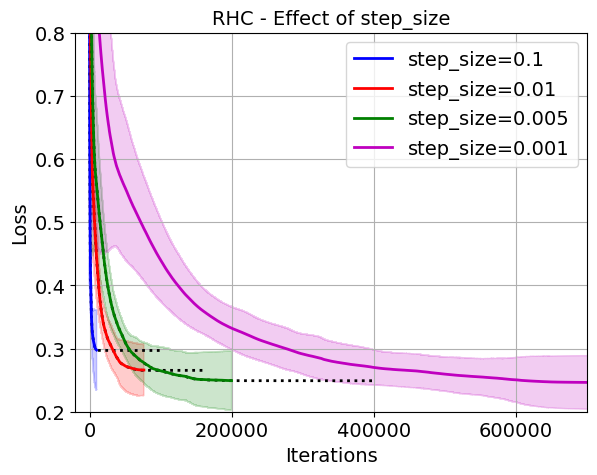

In [45]:
fontsize = 14
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])

ax.plot(range(fitcrv_rhc_lr01_fls.shape[0]), fitcrv_rhc_lr01_fls['mean'], 'k:', linewidth=2)
ax.plot(range(fitcrv_rhc_lr01_tr100.shape[0]), fitcrv_rhc_lr01_tr100['mean'], label='step_size=0.1', color='b', linewidth=2)
ax.fill_between(range(fitcrv_rhc_lr01_tr100.shape[0]), fitcrv_rhc_lr01_tr100['mean'] - 2*fitcrv_rhc_lr01_tr100['std'], 
                fitcrv_rhc_lr01_tr100['mean'] + 2*fitcrv_rhc_lr01_tr100['std'], alpha=0.2, color="b")

ax.plot(range(fitcrv_rhc_lr001_fls.shape[0]), fitcrv_rhc_lr001_fls['mean'],'k:', linewidth=2)
ax.plot(range(fitcrv_rhc_lr001_re200.shape[0]), fitcrv_rhc_lr001_re200['mean'], label='step_size=0.01', color='r', linewidth=2)
ax.fill_between(range(fitcrv_rhc_lr001_re200.shape[0]), fitcrv_rhc_lr001_re200['mean'] - 2*fitcrv_rhc_lr001_re200['std'], 
                fitcrv_rhc_lr001_re200['mean'] + 2*fitcrv_rhc_lr001_re200['std'], alpha=0.2, color="r")

ax.plot(range(fitcrv_rhc_lr0005_fls.shape[0]), fitcrv_rhc_lr0005_fls['mean'],'k:', linewidth=2)
ax.plot(range(fitcrv_rhc_lr0005_tr150.shape[0]), fitcrv_rhc_lr0005_tr150['mean'], label='step_size=0.005', color='g', linewidth=2)
ax.fill_between(range(fitcrv_rhc_lr0005_tr150.shape[0]), fitcrv_rhc_lr0005_tr150['mean'] - 2*fitcrv_rhc_lr0005_tr150['std'], 
                fitcrv_rhc_lr0005_tr150['mean'] + 2*fitcrv_rhc_lr0005_tr150['std'], alpha=0.2, color="g")

ax.plot(range(fitcrv_rhc_lr0001_tr.shape[0]), fitcrv_rhc_lr0001_tr['mean'], label='step_size=0.001', color='m', linewidth=2)
ax.fill_between(range(fitcrv_rhc_lr0001_tr.shape[0]), fitcrv_rhc_lr0001_tr['mean'] - 2*fitcrv_rhc_lr0001_tr['std'], 
                fitcrv_rhc_lr0001_tr['mean'] + 2*fitcrv_rhc_lr0001_tr['std'], alpha=0.2, color="m")

ax.tick_params(labelsize=fontsize)

ax.set_title('RHC - Effect of step_size', fontsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Loss', fontsize=fontsize)
#plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0, 0),fontsize=14)
ax.set_xlim(-20000, 700000)
ax.set_xticks([0,200000,400000,600000])
ax.set_ylim(0.2, 0.8)
ax.legend(fontsize=fontsize)
# Turn on the grid
plt.grid(True)
plt.show()
fig.savefig('rhc_effect_step_size.png')
plt.close(fig)

In [32]:
seed_list = [1, 2, 3, 4, 5]
learning_rate_list = [0.1, 0.01, 0.005]
restart_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
max_iters = 400000
early_stopping = True
max_attempts = 400

parameters = []

output_file = 'rhc_clbr_restarts'

for restarts in restart_list:
    for learning_rate in learning_rate_list:
        for seed in seed_list:
            
            parameters.append((restarts, max_iters, learning_rate, early_stopping, max_attempts, seed, X_train, y_train, X_vld, y_vld, output_file))

print('restarts', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('restarts', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', 
      'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 'train_time','fitness',
      file=open(output_file+'_results.txt', 'a'))

tic = time.perf_counter()
if __name__ ==  '__main__':
    p=Pool(processes = 22)
    output = p.map(workers_rhc.rhc_clbr, parameters)
    print('Done!')
toc = time.perf_counter()
print(f'train_time={toc-tic}')

Done!
train_time=7624.962084400002


In [46]:
df_rhc_restarts = pd.read_csv('rhc_clbr_restarts_results.txt', sep=' ')
df_rhc_restarts_mean = df_rhc_restarts.groupby(['restarts', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts']).mean()
df_rhc_restarts_std  = df_rhc_restarts.groupby(['restarts', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts']).std()
df_rhc_restarts_mean

seed  auc_train  \
restarts max_iters learning_rate early_stopping max_attempts                    
0        400000    0.005         True           400            3.0   0.949167   
                   0.010         True           400            3.0   0.940877   
                   0.100         True           400            3.0   0.919465   
1        400000    0.005         True           400            3.0   0.950855   
                   0.010         True           400            3.0   0.947802   
                   0.100         True           400            3.0   0.925050   
2        400000    0.005         True           400            3.0   0.951822   
                   0.010         True           400            3.0   0.948880   
                   0.100         True           400            3.0   0.926501   
3        400000    0.005         True           400            3.0   0.952346   
                   0.010         True           400            3.0   0.948880   
                   0.100         True           400            3.0   0.931942   
4        400000    0.005         True           400            3.0   0.952346   
                   0.010         True           400            3.0   0.947496   
                   0.100         True           400            3.0   0.931942   
5        400000    0.005         True           400            3.0   0.952346   
                   0.010         True           400            3.0   0.947721   
                   0.100         True           400            3.0   0.931942   
6        400000    0.005         True           400            3.0   0.952346   
                   0.010         True           400            3.0   0.947927   
                   0.100         True           400            3.0   0.939160   
7        400000    0.005         True           400            3.0   0.952346   
                   0.010         True           400            3.0   0.947927   
                   0.100         True           400            3.0   0.939160   
8        400000    0.005         True           400            3.0   0.952346   
                   0.010         True           400            3.0   0.949232   
                   0.100         True           400            3.0   0.942892   
9        400000    0.005         True           400            3.0   0.952346   
                   0.010         True           400            3.0   0.949232   
                   0.100         True           400            3.0   0.942892   
10       400000    0.005         True           400            3.0   0.952346   
                   0.010         True           400            3.0   0.949232   
                   0.100         True           400            3.0   0.942892   

                                                               auc_vld  \
restarts max_iters learning_rate early_stopping max_attempts             
0        400000    0.005         True           400           0.888390   
                   0.010         True           400           0.888464   
                   0.100         True           400           0.876816   
1        400000    0.005         True           400           0.887566   
                   0.010         True           400           0.892584   
                   0.100         True           400           0.881161   
2        400000    0.005         True           400           0.886966   
                   0.010         True           400           0.890112   
                   0.100         True           400           0.872697   
3        400000    0.005         True           400           0.881798   
                   0.010         True           400           0.890112   
                   0.100         True           400           0.896891   
4        400000    0.005         True           400           0.881798   
                   0.010         True           400           0.891835   
                   0.100         True     

In [48]:


fitness_mean = df_rhc_restarts_mean['fitness'].values
fitness_std = df_rhc_restarts_std['fitness'].values

time_mean = df_rhc_restarts_mean['train_time'].values
time_std = df_rhc_restarts_std['train_time'].values

auc_vld_mean = df_rhc_restarts_mean['auc_vld'].values
auc_vld_std = df_rhc_restarts_std['auc_vld'].values

fitness_mean_01   = np.zeros(len(restart_list))
fitness_mean_001  = np.zeros(len(restart_list))
fitness_mean_0005 = np.zeros(len(restart_list))

fitness_std_01   = np.zeros(len(restart_list))
fitness_std_001  = np.zeros(len(restart_list))
fitness_std_0005 = np.zeros(len(restart_list))

time_mean_01   = np.zeros(len(restart_list))
time_mean_001  = np.zeros(len(restart_list))
time_mean_0005 = np.zeros(len(restart_list))

time_std_01   = np.zeros(len(restart_list))
time_std_001  = np.zeros(len(restart_list))
time_std_0005 = np.zeros(len(restart_list))

auc_vld_mean_01   = np.zeros(len(restart_list))
auc_vld_mean_001  = np.zeros(len(restart_list))
auc_vld_mean_0005 = np.zeros(len(restart_list))

auc_vld_std_01   = np.zeros(len(restart_list))
auc_vld_std_001  = np.zeros(len(restart_list))
auc_vld_std_0005 = np.zeros(len(restart_list))

r, s, t = -1, -1, -1
for i in range(0, len(fitness_mean)):
    if (i+1)%3 == 0:
        r += 1
        fitness_mean_01[r] = fitness_mean[i]
        fitness_std_01[r] = fitness_std[i]
        time_mean_01[r] = time_mean[i]
        time_std_01[r] = time_std[i]
        auc_vld_mean_01[r] = auc_vld_mean[i]
        auc_vld_std_01[r] = auc_vld_std[i]
    elif (i+1)%3 == 2:
        s += 1
        fitness_mean_001[s] = fitness_mean[i]
        fitness_std_001[s] = fitness_std[i]
        time_mean_001[s] = time_mean[i]
        time_std_001[s] = time_std[i]
        auc_vld_mean_001[s] = auc_vld_mean[i]
        auc_vld_std_001[s] = auc_vld_std[i]
    else:
        t += 1
        fitness_mean_0005[t] = fitness_mean[i]
        fitness_std_0005[t] = fitness_std[i]
        time_mean_0005[t] = time_mean[i]
        time_std_0005[t] = time_std[i]
        auc_vld_mean_0005[t] = auc_vld_mean[i]
        auc_vld_std_0005[t] = auc_vld_std[i]

In [144]:
auc_vld_mean

array([0.88838951, 0.88846442, 0.87681648, 0.88756554, 0.89258427,
       0.88116105, 0.88696629, 0.89011236, 0.87269663, 0.88179775,
       0.89011236, 0.89689139, 0.88179775, 0.89183521, 0.89689139,
       0.88179775, 0.88621723, 0.89689139, 0.88179775, 0.88329588,
       0.89775281, 0.88179775, 0.88329588, 0.89775281, 0.88179775,
       0.88468165, 0.89820225, 0.88179775, 0.88468165, 0.89820225,
       0.88179775, 0.88468165, 0.89820225])

In [145]:
auc_vld_mean_0005

array([0.88838951, 0.88756554, 0.88696629, 0.88179775, 0.88179775,
       0.88179775, 0.88179775, 0.88179775, 0.88179775, 0.88179775,
       0.88179775])

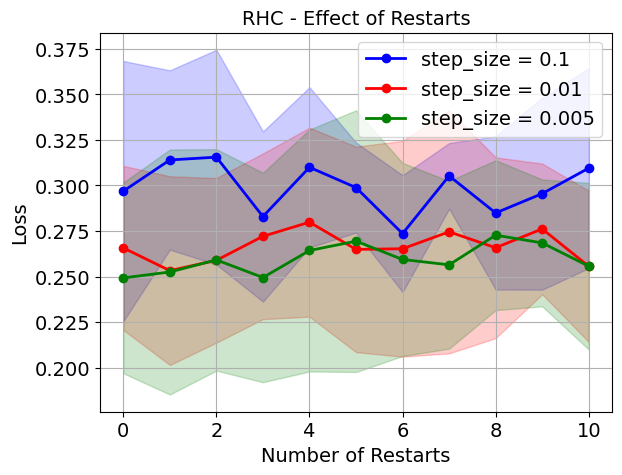

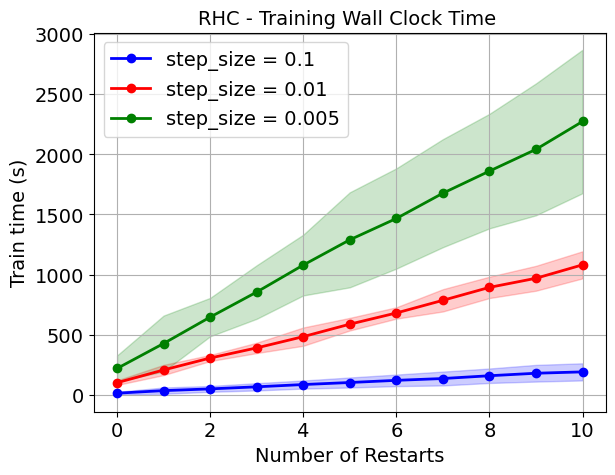

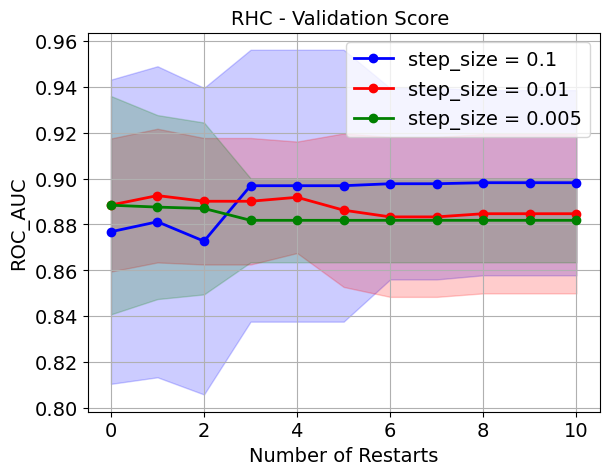

In [52]:
restart_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

fontsize = 14
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])

ax.plot(restart_list, fitness_mean_01, '-o', label='step_size = 0.1', color='b', linewidth=2)
ax.fill_between(restart_list, fitness_mean_01 - 2*fitness_std_01, fitness_mean_01 + 2*fitness_std_01, alpha=0.2, color="b")

ax.plot(restart_list, fitness_mean_001, '-o', label='step_size = 0.01', color='r', linewidth=2)
ax.fill_between(restart_list, fitness_mean_001 - 2*fitness_std_001, fitness_mean_001 + 2*fitness_std_001, alpha=0.2, color="r")

ax.plot(restart_list, fitness_mean_0005, '-o', label='step_size = 0.005', color='g', linewidth=2)
ax.fill_between(restart_list, fitness_mean_0005 - 2*fitness_std_0005, fitness_mean_0005 + 2*fitness_std_0005, alpha=0.2, color="g")

ax.set_title('RHC - Effect of Restarts', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Number of Restarts', fontsize=fontsize) 
ax.set_ylabel('Loss', fontsize=fontsize)
#ax.set_xlim(0, 8000)
#ax.set_ylim(0.2, 1)
ax.legend(fontsize=fontsize)
# Turn on the grid
plt.grid(True)
plt.show()
fig.savefig('rhc_effect_restarts.png')
plt.close(fig)

# train time
fontsize = 14
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])

ax.plot(restart_list, time_mean_01, '-o', label='step_size = 0.1', color='b', linewidth=2)
ax.fill_between(restart_list, time_mean_01 - 2*time_std_01, time_mean_01 + 2*time_std_01, alpha=0.2, color="b")

ax.plot(restart_list, time_mean_001, '-o', label='step_size = 0.01', color='r', linewidth=2)
ax.fill_between(restart_list, time_mean_001 - 2*time_std_001, time_mean_001 + 2*time_std_001, alpha=0.2, color="r")

ax.plot(restart_list, time_mean_0005, '-o', label='step_size = 0.005', color='g', linewidth=2)
ax.fill_between(restart_list, time_mean_0005 - 2*time_std_0005, time_mean_0005 + 2*time_std_0005, alpha=0.2, color="g")

ax.set_title('RHC - Training Wall Clock Time ', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Number of Restarts', fontsize=fontsize) 
ax.set_ylabel('Train time (s)', fontsize=fontsize)
#ax.set_xlim(0, 8000)
#ax.set_ylim(0.2, 1)
ax.legend(fontsize=fontsize)
# Turn on the grid
plt.grid(True)
plt.show()
fig.savefig('rhc_timing.png')
plt.close(fig)

# train time
fontsize = 14
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])

ax.plot(restart_list, auc_vld_mean_01, '-o', label='step_size = 0.1', color='b', linewidth=2)
ax.fill_between(restart_list, auc_vld_mean_01 - 2*auc_vld_std_01, auc_vld_mean_01 + 2*auc_vld_std_01, alpha=0.2, color="b")

ax.plot(restart_list, auc_vld_mean_001, '-o', label='step_size = 0.01', color='r', linewidth=2)
ax.fill_between(restart_list, auc_vld_mean_001 - 2*auc_vld_std_001, auc_vld_mean_001 + 2*auc_vld_std_001, alpha=0.2, color="r")

ax.plot(restart_list, auc_vld_mean_0005, '-o', label='step_size = 0.005', color='g', linewidth=2)
ax.fill_between(restart_list, auc_vld_mean_0005 - 2*auc_vld_std_0005, auc_vld_mean_0005 + 2*auc_vld_std_0005, alpha=0.2, color="g")

ax.set_title('RHC - Validation Score ', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Number of Restarts', fontsize=fontsize) 
ax.set_ylabel('ROC_AUC', fontsize=fontsize)
#ax.set_xlim(0, 8000)
#ax.set_ylim(0.86, 0.92)
ax.legend(fontsize=fontsize)
# Turn on the grid
plt.grid(True)
plt.show()
fig.savefig('rhc_auc_vld.png')
plt.close(fig)

In [86]:
seed_list = [1, 2, 3, 4, 5]
learning_rate_list = [0.1, 1.0]
restart_list = list(range(10, 41))
max_iters = 100000
early_stopping = True
max_attempts = 400

parameters = []

output_file = 'rhc_clbr_restarts2'

for restarts in restart_list:
    for learning_rate in learning_rate_list:
        for seed in seed_list:
            
            parameters.append((restarts, max_iters, learning_rate, early_stopping, max_attempts, seed, X_train, y_train, X_vld, y_vld, output_file))

print('restarts', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('restarts', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', 
      'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 'train_time','fitness',
      file=open(output_file+'_results.txt', 'a'))

tic = time.perf_counter()
if __name__ ==  '__main__':
    p=Pool(processes = 22)
    output = p.map(workers_rhc.rhc_clbr, parameters)
    print('Done!')
toc = time.perf_counter()
print(f'train_time={toc-tic}')

Done!
train_time=5329.654503200203


In [88]:
df_rhc_restarts2 = pd.read_csv('rhc_clbr_restarts2_results.txt', sep=' ')
df_rhc_restarts2_mean = df_rhc_restarts2.groupby(['restarts', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts']).mean()
df_rhc_restarts2_std  = df_rhc_restarts2.groupby(['restarts', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts']).std()
df_rhc_restarts2_mean

seed  auc_train  \
restarts max_iters learning_rate early_stopping max_attempts                    
10       100000    0.1           True           400            3.0   0.942892   
                   1.0           True           400            3.0   0.887860   
11       100000    0.1           True           400            3.0   0.942892   
                   1.0           True           400            3.0   0.892212   
12       100000    0.1           True           400            3.0   0.942892   
...                                                            ...        ...   
38       100000    1.0           True           400            3.0   0.899567   
39       100000    0.1           True           400            3.0   0.943309   
                   1.0           True           400            3.0   0.899567   
40       100000    0.1           True           400            3.0   0.943309   
                   1.0           True           400            3.0   0.899567   

                                                               auc_vld  \
restarts max_iters learning_rate early_stopping max_attempts             
10       100000    0.1           True           400           0.898202   
                   1.0           True           400           0.845131   
11       100000    0.1           True           400           0.898202   
                   1.0           True           400           0.854419   
12       100000    0.1           True           400           0.898202   
...                                                                ...   
38       100000    1.0           True           400           0.864120   
39       100000    0.1           True           400           0.883820   
                   1.0           True           400           0.864120   
40       100000    0.1           True           400           0.883820   
                   1.0           True           400           0.864120   

                                                              acc_train  \
restarts max_iters learning_rate early_stopping max_attempts              
10       100000    0.1           True           400            0.843220   
                   1.0           True           400            0.806356   
11       100000    0.1           True           400            0.843220   
                   1.0           True           400            0.806356   
12       100000    0.1           True           400            0.843220   
...                                                                 ...   
38       100000    1.0           True           400            0.812288   
39       100000    0.1           True           400            0.846186   
                   1.0           True           400            0.812288   
40       100000    0.1           True           400            0.846186   
                   1.0           True           400            0.812288   

                                                               acc_vld  \
restarts max_iters learning_rate early_stopping max_attempts             
10       100000    0.1           True           400           0.808403   
                   1.0           True           400           0.786555   
11       100000    0.1           True           400           0.808403   
                   1.0           True           400           0.793277   
12       100000    0.1           True           400           0.808403   
...                                                                ...   
38       100000    1.0           True           400           0.781513   
39       100000    0.1           True           400           0.798319   
                   1.0           True           400           0.781513   
40       100000    0.1           True           400           0.798319   
                   1.0           True           400           0.781513   

                                                              f1_train  \
restarts max_iters learning_rate

In [138]:
display(df_rhc_restarts2_mean.to_string())

'                                                              seed  auc_train   auc_vld  acc_train   acc_vld  f1_train    f1_vld  train_time   fitness\nrestarts max_iters learning_rate early_stopping max_attempts                                                                                          \n10       100000    0.1           True           400            3.0   0.942892  0.898202   0.843220  0.808403  0.575694  0.464466  194.605310  0.309536\n                   1.0           True           400            3.0   0.887860  0.845131   0.806356  0.786555  0.484748  0.436758   34.772007  0.379572\n11       100000    0.1           True           400            3.0   0.942892  0.898202   0.843220  0.808403  0.575694  0.464466  209.149718  0.306290\n                   1.0           True           400            3.0   0.892212  0.854419   0.806356  0.793277  0.472985  0.463425   37.710658  0.378018\n12       100000    0.1           True           400            3.0   0.942892  0.898202

In [89]:
restart_list = list(range(10, 41))

fitness_mean2 = df_rhc_restarts2_mean['fitness'].values
fitness_std2 = df_rhc_restarts2_std['fitness'].values

time_mean2 = df_rhc_restarts2_mean['train_time'].values
time_std2 = df_rhc_restarts2_std['train_time'].values

fitness_mean2_01   = np.zeros(len(restart_list))
fitness_mean2_1  = np.zeros(len(restart_list))

fitness_std2_01   = np.zeros(len(restart_list))
fitness_std2_1  = np.zeros(len(restart_list))

time_mean2_01   = np.zeros(len(restart_list))
time_mean2_1  = np.zeros(len(restart_list))

time_std2_01   = np.zeros(len(restart_list))
time_std2_1  = np.zeros(len(restart_list))


r, t = -1, -1
for i in range(0, len(fitness_mean2)):
    if (i+1)%2 == 0:
        r += 1
        fitness_mean2_1[r] = fitness_mean2[i]
        fitness_std2_1[r] = fitness_std2[i]
        time_mean2_1[r] = time_mean2[i]
        time_std2_1[r] = time_std2[i]
    else:
        t += 1
        fitness_mean2_01[t] = fitness_mean2[i]
        fitness_std2_01[t] = fitness_std2[i]
        time_mean2_01[t] = time_mean2[i]
        time_std2_01[t] = time_std2[i]

In [92]:
fitness_mean2_1

array([0.37957182, 0.37801828, 0.37723962, 0.37874631, 0.37762744,
       0.39771795, 0.37861311, 0.38838876, 0.41899861, 0.38391947,
       0.38724024, 0.37186817, 0.37418744, 0.36594703, 0.3729338 ,
       0.38457336, 0.37763955, 0.3737728 , 0.37165163, 0.3975788 ,
       0.3841247 , 0.39422812, 0.37464355, 0.37902306, 0.37256421,
       0.38746948, 0.38354003, 0.38834792, 0.3804589 , 0.38128119,
       0.36789747])

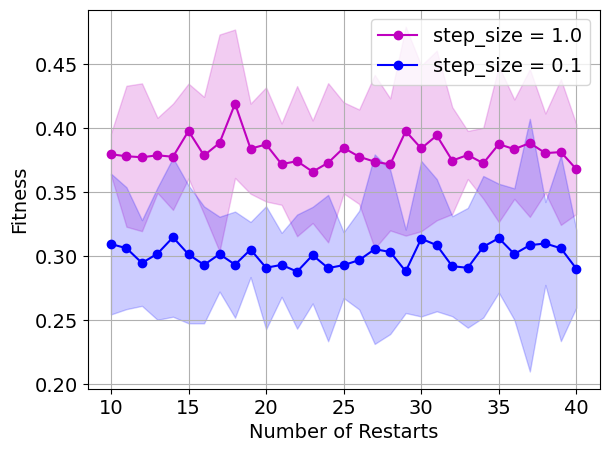

In [91]:
restart_list = list(range(10, 41))

fontsize = 14
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])

ax.plot(restart_list, fitness_mean2_1, '-o', label='step_size = 1.0', color='m')
ax.fill_between(restart_list, fitness_mean2_1 - 2*fitness_std2_1, fitness_mean2_1 + 2*fitness_std2_1, alpha=0.2, color="m")

ax.plot(restart_list, fitness_mean2_01, '-o', label='step_size = 0.1', color='b')
ax.fill_between(restart_list, fitness_mean2_01 - 2*fitness_std2_01, fitness_mean2_01 + 2*fitness_std2_01, alpha=0.2, color="b")

ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Number of Restarts', fontsize=fontsize) 
ax.set_ylabel('Fitness', fontsize=fontsize)
#ax.set_xlim(0, 8000)
#ax.set_ylim(0.2, 1)
ax.legend(fontsize=fontsize)
# Turn on the grid
plt.grid(True)
plt.show()
plt.close(fig)


In [54]:
## Learning curves
#import importlib
#importlib.reload(workers_rhc)
import workers_rhc

seed_list = [1, 2, 3, 4, 5]
#learning_rate_list = 0.01
#restart = 1
learning_rate = 0.1
restarts = 3 # in rhclrncrv2_B
#restarts = 8 in rhclrncrv2
max_iters = 100000
early_stopping = True
max_attempts = 400

training_size_list = list(np.arange(0.05, 1.05, 0.05))

output_file = 'rhclrncrv2_B'

parameters = []

for training_size in training_size_list:
    for seed in seed_list:
        parameters.append((restarts, max_iters, learning_rate, early_stopping, max_attempts, seed, 
                           X_train, y_train, X_vld, y_vld, output_file, training_size))

print('training_size', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('training_size', 'seed', 'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 'train_time','fitness',
      file=open(output_file+'_results.txt', 'a'))

if __name__ ==  '__main__':
    p=Pool(processes = 20)
    output = p.map(workers_rhc.rhclrncrv, parameters)
    print('Done!')

Done!


In [55]:
df_rhclrncrv = pd.read_csv('rhclrncrv2_B_results.txt', sep=' ')
df_rhclrncrv_mean_scores = df_rhclrncrv.groupby(['training_size']).mean()
df_rhclrncrv_std_scores = df_rhclrncrv.groupby(['training_size']).std()
df_rhclrncrv_mean_scores

,seed,auc_train,auc_vld,acc_train,acc_vld,f1_train,f1_vld,train_time,fitness
training_size,,,,,,,,,
0.05,3.0,0.994444,0.681386,0.916667,0.653782,0.715152,0.271703,64.990294,0.115559
0.10,3.0,0.999306,0.704195,0.979167,0.684034,0.954941,0.413249,57.978367,0.077208
0.15,3.0,0.995493,0.810262,0.929577,0.757983,0.760299,0.456323,59.407426,0.128866
0.20,3.0,0.989789,0.784569,0.890526,0.763025,0.654934,0.403678,54.725482,0.157514
0.25,3.0,0.988371,0.818539,0.901695,0.774790,0.763116,0.500433,55.202927,0.178788
0.30,3.0,0.978590,0.820150,0.900000,0.771429,0.777760,0.519029,55.394258,0.233225
0.35,3.0,0.967224,0.788202,0.869880,0.783193,0.613172,0.425950,55.778117,0.217659
0.40,3.0,0.973239,0.778352,0.906878,0.742857,0.787705,0.454564,57.709545,0.205453
0.45,3.0,0.972417,0.819513,0.860094,0.766387,0.587517,0.389315,57.671290,0.205074


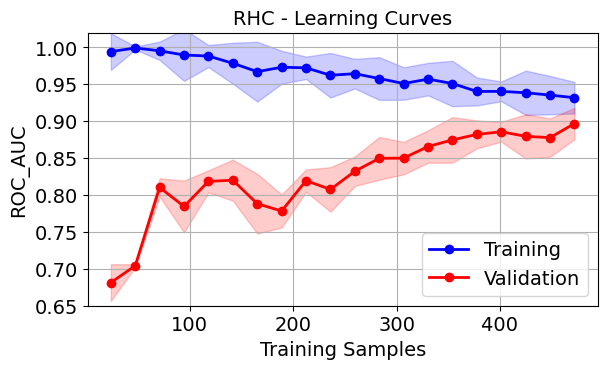

In [73]:
training_samples = np.array(training_size_list) * X_train.shape[0]

fontsize = 14
fig = plt.figure(figsize=(6,3.5))
ax = fig.add_axes([0.13, 0.15, 0.85, 0.78])
ax.plot(training_samples, df_rhclrncrv_mean_scores['auc_train'], '-o', label='Training', color='b',linewidth=2)
ax.fill_between(training_samples, df_rhclrncrv_mean_scores['auc_train'] - 2*df_rhclrncrv_std_scores['auc_train'], 
                                  df_rhclrncrv_mean_scores['auc_train'] + 2*df_rhclrncrv_std_scores['auc_train'], alpha=0.2, color="b")

ax.plot(training_samples, df_rhclrncrv_mean_scores['auc_vld'], '-o', label='Validation', color='r',linewidth=2)
ax.fill_between(training_samples, df_rhclrncrv_mean_scores['auc_vld'] - 2*df_rhclrncrv_std_scores['auc_train'], 
                                  df_rhclrncrv_mean_scores['auc_vld'] + 2*df_rhclrncrv_std_scores['auc_train'], alpha=0.2, color="r")

ax.set_title('RHC - Learning Curves', fontsize=fontsize)
ax.set_xlabel('Training Samples', fontsize=fontsize) 
ax.set_ylabel('ROC_AUC', fontsize=fontsize)
ax.set_ylim(0.65,1.02)
ax.set_yticks(np.arange(0.65,1.05,0.05))
ax.tick_params(labelsize=fontsize)
ax.legend(fontsize=fontsize,loc='lower right')
plt.grid(True)
fig.savefig('rhc_training_sample.png')
plt.show()
plt.close(fig)

In [ ]:
# Final training

seed_list = [1, 2, 3, 4, 5]
learning_rate = 0.1
#restarts = 8 # rhc_final
restarts = 3
max_iters = 100000
early_stopping = True
max_attempts = 400

parameters = []

output_file = 'rhc_final_B'

for seed in seed_list:
    
    parameters.append((restarts, max_iters, learning_rate, early_stopping, max_attempts, seed, X_train_full, y_train_full, X_test, y_test,
                               output_file))

print('restarts', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('restarts', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', 
      'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 'train_time', 'fitness',
      file=open(output_file+'_results.txt', 'a'))

tic = time.perf_counter()
if __name__ ==  '__main__':
    p=Pool(processes = 5)
    output = p.map(workers_rhc.rhc_clbr, parameters)
    print('Done!')
toc = time.perf_counter()
print(f'train_time={toc-tic}')

fitcrv=pd.DataFrame()
k = -1
max_len = 0
columns = []
for seed in seed_list:
    k += 1
    if (output[k].shape[0] > max_len): max_len = output[k].shape[0]
    columns.append(f'seed{seed}')
   
fitcrv = pd.DataFrame(np.nan, index=list(range(0,max_len)), columns=columns)
k = -1
for seed in seed_list:
    k += 1
    fitcrv[f'seed{seed}'].values[0:output[k].shape[0]] = output[k][:,0]
fitcrv.ffill(inplace=True)
fitcrv['mean'] = fitcrv.mean(axis=1)
fitcrv['std'] = fitcrv.std(axis=1)
rhc_final = fitcrv

In [80]:
df_rhc_final = pd.read_csv('rhc_final_B_results.txt', sep=' ')
df_rhc_final_mean = df_rhc_final.groupby(['restarts', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts']).mean()
df_rhc_final_std  = df_rhc_final.groupby(['restarts', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts']).std()
df_rhc_final_mean

,,,,,seed,auc_train,auc_vld,acc_train,acc_vld,f1_train,f1_vld,train_time,fitness
restarts,max_iters,learning_rate,early_stopping,max_attempts,,,,,,,,,
3,100000,0.1,True,400,3.0,0.931934,0.869211,0.825719,0.782677,0.493676,0.397615,73.243105,0.302657


In [81]:
df_rhc_final_std

,,,,,seed,auc_train,auc_vld,acc_train,acc_vld,f1_train,f1_vld,train_time,fitness
restarts,max_iters,learning_rate,early_stopping,max_attempts,,,,,,,,,
3,100000,0.1,True,400,1.581139,0.014299,0.02291,0.052522,0.031422,0.305515,0.243652,22.027659,0.013099


In [75]:
rhc_final.to_csv('rhc_finalB_fitness_curve.csv', index=False) 

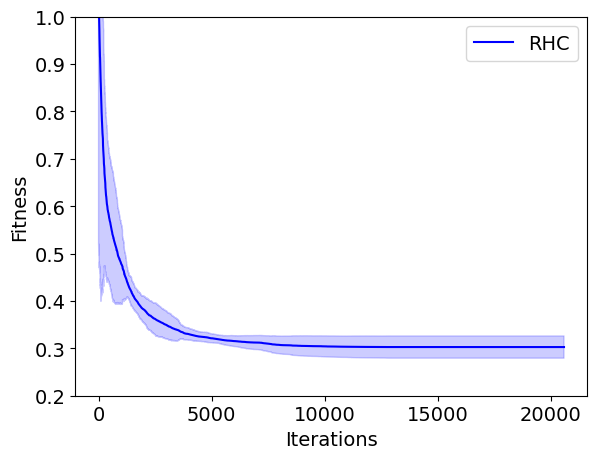

In [76]:
rhc_final=pd.read_csv('rhc_finalB_fitness_curve.csv') 
rhc_final
fontsize = 14
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])

ax.plot(range(rhc_final.shape[0]), rhc_final['mean'], label='RHC', color='b')
ax.fill_between(range(rhc_final.shape[0]), rhc_final['mean'] - 2*rhc_final['std'], 
                                           rhc_final['mean'] + 2*rhc_final['std'], alpha=0.2, color="b")

ax.tick_params(labelsize=fontsize)

#ax.plot(range(len(fitness_curve_rhc6)), fitness_curve_rhc6.mean(axis=1),'b', label='Training max_attempts=100\nlearning_rate=0.001')
#ax.tick_params(labelsize=fontsize)

ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fitness', fontsize=fontsize)
#ax.set_xlim(0, 8000)
ax.set_ylim(0.2, 1)
ax.legend(fontsize=fontsize)
plt.show()
plt.close(fig)

In [77]:
gd_final = pd.read_csv('../gd/gd_final_fitness_curve.csv', sep=' ', header=None)
rhc_final = pd.read_csv('rhc_finalB_fitness_curve.csv', sep=',')
sa_final = pd.read_csv('../sa/sa_final1_fitness_curve.csv', sep=',')
ga_final = pd.read_csv('../ga/ga_final_fitness_curve.csv', sep=',')

In [82]:
gd_final

,0
0,-0.685261
1,-0.674475
2,-0.664388
3,-0.654963
4,-0.646223
...,...
39995,-0.184003
39996,-0.183886
39997,-0.184095
39998,-0.184211


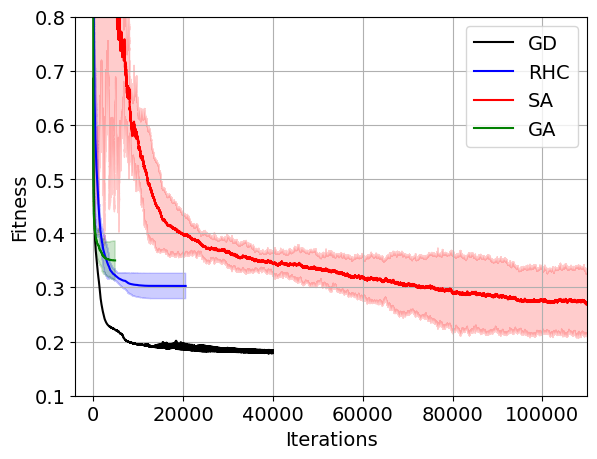

In [59]:
fontsize = 14
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])

ax.plot(range(gd_final.shape[0]), -gd_final.values, label='GD', color='k')

ax.plot(range(rhc_final.shape[0]), rhc_final['mean'], label='RHC', color='b')
ax.fill_between(range(rhc_final.shape[0]), rhc_final['mean'] - 2*rhc_final['std'], 
                                           rhc_final['mean'] + 2*rhc_final['std'], alpha=0.2, color="b")

ax.plot(range(sa_final.shape[0]), sa_final['mean'], label='SA', color='r')
ax.fill_between(range(sa_final.shape[0]), sa_final['mean'] - 2*sa_final['std'], 
                                          sa_final['mean'] + 2*sa_final['std'], alpha=0.2, color="r")

ax.plot(range(ga_final.shape[0]), ga_final['mean'], label='GA', color='g')
ax.fill_between(range(ga_final.shape[0]), ga_final['mean'] - 2*ga_final['std'], 
                                          ga_final['mean'] + 2*ga_final['std'], alpha=0.2, color="g")

ax.tick_params(labelsize=fontsize)

#ax.plot(range(len(fitness_curve_rhc6)), fitness_curve_rhc6.mean(axis=1),'b', label='Training max_attempts=100\nlearning_rate=0.001')
#ax.tick_params(labelsize=fontsize)

ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fitness', fontsize=fontsize)
ax.set_xlim(-4000, 110000)
ax.set_ylim(0.1, 0.8)
ax.legend(fontsize=fontsize)
plt.grid(True)
plt.show()
plt.close(fig)

In [74]:
print(gd_final.shape[0])
print(rhc_final.shape[0])
print(sa_final.shape[0])
print(ga_final.shape[0])

40000
20574
400000
4864
